In [6]:
import pandas as pd
import numpy as np
import xlrd
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
from scipy.stats import skew, norm, kurtosis
xls = pd.ExcelFile(r"data_matstat.xls")
sheetX = xls.parse(2)
var1 = sheetX['B7']
X1 = np.array(var1)
var2 = sheetX['B8']
X2 = np.array(var2)
var3 = sheetX['B9']
X3 = np.array(var3)
np.size(X1), X2, X3

(252,
 array([67.75, 72.25, 66.25, 72.25, 71.25, 74.75, 69.75, 72.5 , 74.  ,
        73.5 , 74.5 , 76.  , 69.5 , 71.25, 69.5 , 66.  , 71.  , 71.  ,
        67.75, 73.5 , 68.  , 69.75, 68.25, 70.  , 67.75, 71.5 , 67.5 ,
        67.5 , 64.75, 69.  , 73.75, 71.25, 71.25, 71.  , 73.5 , 65.  ,
        70.  , 68.25, 72.25, 67.  , 68.75, 29.5 , 70.  , 71.5 , 68.  ,
        73.25, 67.5 , 71.25, 68.5 , 66.75, 72.25, 69.  , 67.75, 73.5 ,
        67.5 , 72.  , 68.  , 69.5 , 70.75, 65.75, 73.25, 68.5 , 70.25,
        67.  , 70.  , 67.5 , 70.75, 71.5 , 69.25, 71.5 , 71.5 , 68.75,
        73.75, 64.  , 65.75, 67.5 , 69.5 , 68.5 , 70.25, 69.25, 67.75,
        67.25, 72.75, 70.  , 69.25, 67.5 , 67.25, 65.75, 72.5 , 73.  ,
        70.  , 69.5 , 70.5 , 71.75, 74.5 , 77.75, 73.25, 66.5 , 68.25,
        72.  , 73.5 , 72.  , 71.25, 73.75, 69.25, 68.5 , 73.5 , 74.25,
        75.5 , 69.25, 68.5 , 70.  , 70.  , 70.25, 71.75, 69.25, 72.75,
        72.  , 74.  , 72.25, 74.5 , 71.5 , 68.75, 66.75, 66.5 , 67.  ,


In [7]:
m1 = np.mean(X1)
m1

np.float64(178.92440476190475)

In [8]:
m2 = np.mean(X2)
m2

np.float64(70.14880952380952)

In [9]:
m3 = np.mean(X3)
m3

np.float64(37.992063492063494)

In [10]:
s1 = np.var(X1, ddof=1)
s1

np.float64(863.722718767786)

In [11]:
s2 = np.var(X2, ddof=1)
s2

np.float64(13.416512521343199)

In [12]:
s3 = np.var(X3, ddof=1)
s3

np.float64(5.909339151331183)

In [13]:
s1 = np.std(X1, ddof=1)
s1

np.float64(29.38915988536906)

In [14]:
s2 = np.std(X2, ddof=1)
s2

np.float64(3.6628557876803174)

In [15]:
s3 = np.std(X3, ddof=1)
s3

np.float64(2.430913234019508)

In [16]:
skew(X1)

np.float64(1.19807685393159)

In [17]:
skew(X2)

np.float64(-5.35287990609036)

In [18]:
skew(X3)

np.float64(0.5493250809833784)

In [19]:
kurtosis(X1)

np.float64(5.1418235777488555)

In [20]:
kurtosis(X2)

np.float64(58.34569713021567)

In [21]:
kurtosis(X3)

np.float64(2.6422379931727065)

In [23]:
var = sheetX['B7']
X = np.array(var)

In [24]:
hist, bin_edges = np.histogram(X, bins=9)
bin_edges

array([118.5       , 145.68333333, 172.86666667, 200.05      ,
       227.23333333, 254.41666667, 281.6       , 308.78333333,
       335.96666667, 363.15      ])

In [74]:
stored, stored1 = 0, 0
Xf, Xf1, Xf2 = [], [], []
count = 0
for i in range(9):
    arr = X[bin_edges[i] <= X]
    arr1 = arr[arr < bin_edges[i + 1]]
    if i == 8:
        arr = X[bin_edges[i] <= X]
        arr1 = arr[arr <= bin_edges[i + 1]]
    stored += len(arr1)
    stored1 += round(len(arr1)/len(X), 3)
    Xf.append(stored)
    Xf1.append(stored1)
    Xf2.append(len(arr1))
    count += 1
    print(count, round(bin_edges[i], 2), round(bin_edges[i+1], 2), len(arr1),
          round(len(arr1)/len(X), 3), stored, round(stored1, 3))
print((max(X)-min(X))/9)

1 118.5 145.68 23 0.091 23 0.091
2 145.68 172.87 94 0.373 117 0.464
3 172.87 200.05 79 0.313 196 0.777
4 200.05 227.23 44 0.175 240 0.952
5 227.23 254.42 10 0.04 250 0.992
6 254.42 281.6 1 0.004 251 0.996
7 281.6 308.78 0 0.0 251 0.996
8 308.78 335.97 0 0.0 251 0.996
9 335.97 363.15 1 0.004 252 1.0
27.18333333333333


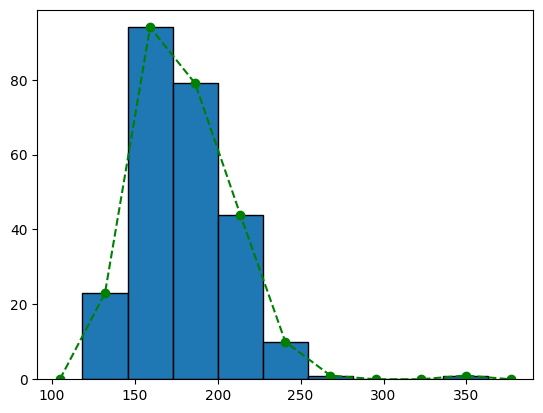

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
a,bins,_ = plt.hist(X, density=False, edgecolor='black',bins=9)
x = np.append([0], a)
x = np.append(x, [0])
width = (X.max() - X.min())/9
bins = np.append([bins[0] - width], bins)
y = bins + width / 2
plt.plot(y, x,'go--')
plt.show()

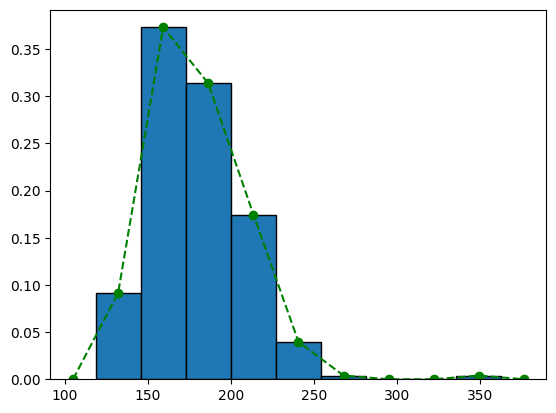

In [49]:
a,bins,_ = plt.hist(X, density=False, edgecolor='black', weights=np.ones_like(X)/len(X),bins=9)
x = np.append([0], a)
x = np.append(x, [0])
width = (X.max() - X.min())/9
bins = np.append([bins[0] - width], bins)
y = bins + width / 2
plt.plot(y, x,'go--')
plt.show()

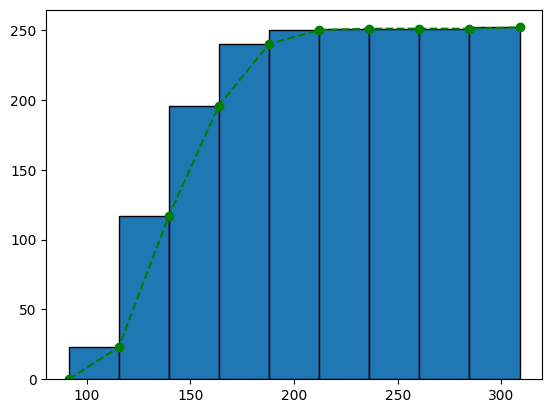

In [50]:
a, bins, _ = plt.hist(bins[:-2], density=False, weights=Xf, edgecolor='black', bins=9)
x = np.append([0], a)
plt.plot(bins, x,'go--')
plt.show()

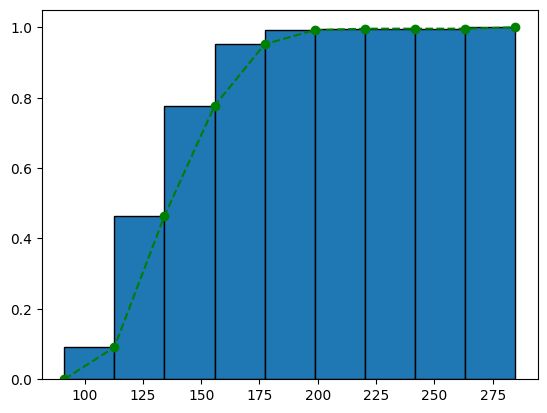

In [51]:
a, bins, _ = plt.hist(bins[:-1], density=False, weights=Xf1, edgecolor='black', bins=9)
x = np.append([0], a)
plt.plot(bins, x, 'go--')
plt.show()

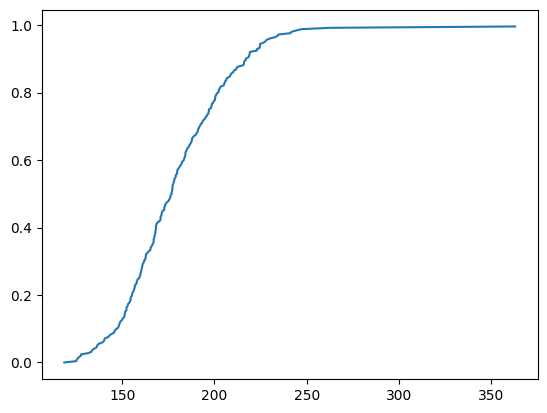

In [52]:
plt.plot(np.sort(X), np.linspace(0, 1, len(X), endpoint=False))

In [56]:
import scipy.stats as st
np.std(X, ddof=1)/np.sqrt(X.shape[0]), st.sem(X)

(np.float64(1.8513430547095728), np.float64(1.8513430547095728))

In [57]:
var = sheetX['B7']
X = np.array(var)
st.t.interval(confidence=0.99, df=len(X)-1,
              loc=np.mean(X),
              scale=st.sem(X))

(np.float64(174.1191362157695), np.float64(183.72967330804002))

In [58]:
st.t.interval(confidence=0.95, df=len(X)-1,
              loc=np.mean(X),
              scale=st.sem(X))

(np.float64(175.27825824870723), np.float64(182.57055127510228))

In [59]:
st.t.interval(confidence=0.9, df=len(X)-1,
              loc=np.mean(X),
              scale=st.sem(X))

(np.float64(175.86793545313094), np.float64(181.98087407067857))

In [60]:
x, y = np.reciprocal(st.chi2.interval(confidence=0.99, df=len(X)-1)) * (len(X) - 1) * np.var(X, ddof=1)
y, x

(np.float64(693.8281003336714), np.float64(1100.2249405313319))

In [61]:
x, y = np.reciprocal(st.chi2.interval(confidence=0.95, df=len(X)-1)) * (len(X) - 1) * np.var(X, ddof=1)
y, x

(np.float64(730.4977952264348), np.float64(1037.2432856751789))

In [62]:
x, y = np.reciprocal(st.chi2.interval(confidence=0.9, df=len(X)-1)) * (len(X) - 1) * np.var(X, ddof=1)
y, x

(np.float64(750.2703123766483), np.float64(1006.8567715623803))

In [63]:
var1, var2 = sheetX['B11'], sheetX['B12']
X1 = np.array(var1)
X2 = np.array(var2)

In [64]:
st.t.interval(confidence=0.99, df=len(X1) + len(X2) - 2,
              loc=(np.mean(X1) - np.mean(X2)),
              scale=np.sqrt(st.sem(X1) ** 2 + st.sem(X2) ** 2))

(np.float64(-9.457466299259718), np.float64(-5.240152748359325))

In [65]:
st.t.interval(confidence=0.95, df=len(X1) + len(X2) - 2,
              loc=(np.mean(X1) - np.mean(X2)),
              scale=np.sqrt(st.sem(X1) ** 2 + st.sem(X2) ** 2))

(np.float64(-8.951062854992152), np.float64(-5.746556192626891))

In [66]:
st.t.interval(confidence=0.9, df=len(X1) + len(X2) - 2,
              loc=(np.mean(X1) - np.mean(X2)),
              scale=np.sqrt(st.sem(X1) ** 2 + st.sem(X2) ** 2))

(np.float64(-8.692701000536662), np.float64(-6.004918047082381))

In [67]:
st.f.interval(confidence=0.99, dfn=len(X1) - 1, dfd=len(X2) - 1,
              scale=np.var(X1, ddof=1) / np.var(X2, ddof=1))

(np.float64(1.6349149561534206), np.float64(3.1393470928901537))

In [68]:
st.f.interval(confidence=0.95, dfn=len(X1) - 1, dfd=len(X2) - 1,
              scale=np.var(X1, ddof=1) / np.var(X2, ddof=1))

(np.float64(1.76794223145054), np.float64(2.9031296517600405))

In [69]:
st.f.interval(confidence=0.9, dfn=len(X1) - 1, dfd=len(X2) - 1,
              scale=np.var(X1, ddof=1) / np.var(X2, ddof=1))

(np.float64(1.8399979875400239), np.float64(2.789440830630925))